In [2]:
import pandas as pd

# Load the Excel file
file_path = "/Users/yasaswiniyerraguntla/Downloads/Time series.xlsx"  
xls = pd.ExcelFile(file_path)

# Read the sheets
simple_df = xls.parse('Simple Data Relation')
complex_df = xls.parse('Complex Data Relation')

# Step 1.1: Drop irrelevant columns
columns_to_keep = ['sensor 1', 'sensor 2', 'sensor 3']
simple_cleaned = simple_df[columns_to_keep]
complex_cleaned = complex_df[columns_to_keep]

# Step 1.2: Check for missing values
print("Missing values in Simple Data Relation:")
print(simple_cleaned.isnull().sum())
print("\nMissing values in Complex Data Relation:")
print(complex_cleaned.isnull().sum())

# Step 1.3: Ensure data types are numeric
simple_cleaned = simple_cleaned.apply(pd.to_numeric, errors='coerce')
complex_cleaned = complex_cleaned.apply(pd.to_numeric, errors='coerce')

# Optional: Drop rows with any missing values after conversion (if any)
simple_cleaned = simple_cleaned.dropna()
complex_cleaned = complex_cleaned.dropna()

# Show first few rows of cleaned data
print("\nCleaned Simple Data Relation:")
print(simple_cleaned.head())

print("\nCleaned Complex Data Relation:")
print(complex_cleaned.head())


Missing values in Simple Data Relation:
sensor 1    0
sensor 2    0
sensor 3    0
dtype: int64

Missing values in Complex Data Relation:
sensor 1    0
sensor 2    0
sensor 3    0
dtype: int64

Cleaned Simple Data Relation:
   sensor 1  sensor 2  sensor 3
0  1.000000   2.00000  0.700000
1  1.010000   1.99995  0.707000
2  1.019999   1.99980  0.713999
3  1.029996   1.99955  0.720997
4  1.039989   1.99920  0.727993

Cleaned Complex Data Relation:
   sensor 1  sensor 2  sensor 3
0  1.000000   2.00000  0.700000
1  1.010000   1.99995  0.707000
2  1.019999   1.99980  0.713999
3  1.029996   1.99955  0.720997
4  1.039989   1.99920  0.727993


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print("Simple Data Descriptive Stats:\n", simple_cleaned.describe())
print("\nComplex Data Descriptive Stats:\n", complex_cleaned.describe())

Simple Data Descriptive Stats:
           sensor 1     sensor 2     sensor 3
count  1008.000000  1008.000000  1008.000000
mean      1.178169     0.940440     0.824718
std       0.666744     0.721886     0.466721
min       0.000003     0.000001     0.000002
25%       0.588869     0.192443     0.412208
50%       1.305817     0.892597     0.914072
75%       1.807793     1.668055     1.265455
max       2.000000     2.000000     1.400000

Complex Data Descriptive Stats:
           sensor 1     sensor 2     sensor 3
count  1008.000000  1008.000000  1008.000000
mean      1.121555     0.940440     0.824718
std       0.724906     0.721886     0.466721
min       0.000001     0.000001     0.000002
25%       0.307832     0.192443     0.412208
50%       1.305817     0.892597     0.914072
75%       1.807793     1.668055     1.265455
max       2.000000     2.000000     1.400000


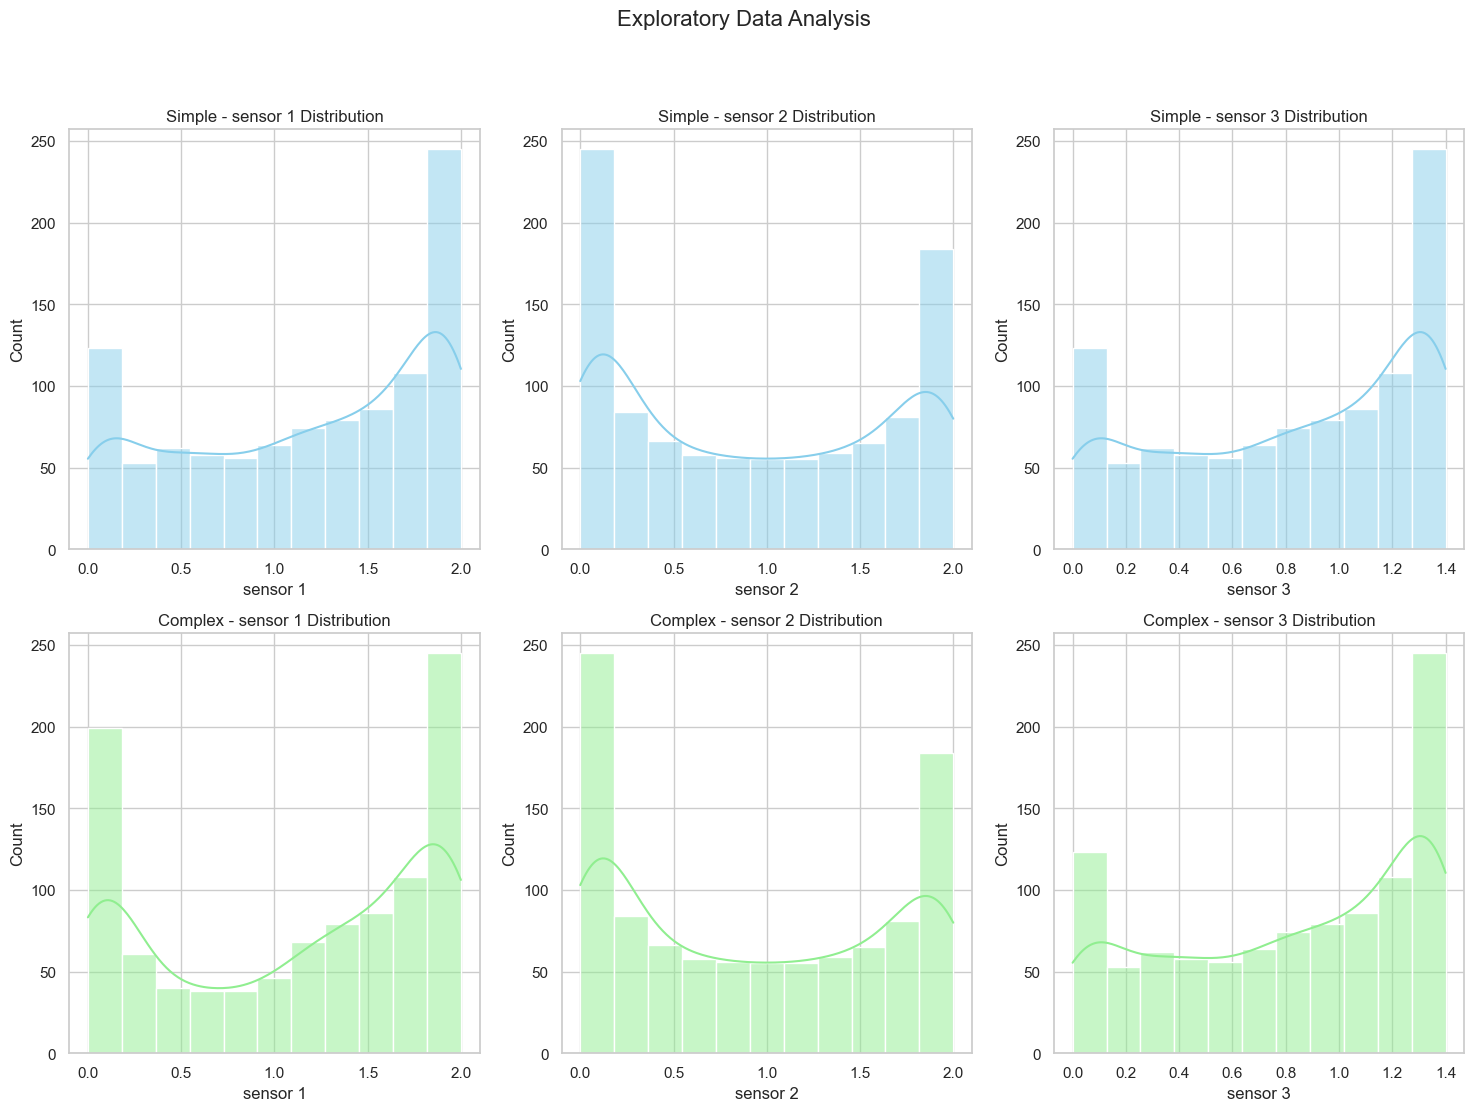

In [6]:
# Visualization
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Exploratory Data Analysis", fontsize=16)

# Distribution plots
for i, sensor in enumerate(columns_to_keep):
    sns.histplot(simple_cleaned[sensor], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f"Simple - {sensor} Distribution")

    sns.histplot(complex_cleaned[sensor], kde=True, ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f"Complex - {sensor} Distribution")

📊 Simple - Max correlation between sensor 1 and sensor 2 occurs at lag = 136
   → sensor 2 is ahead of sensor 1 by 136 time steps


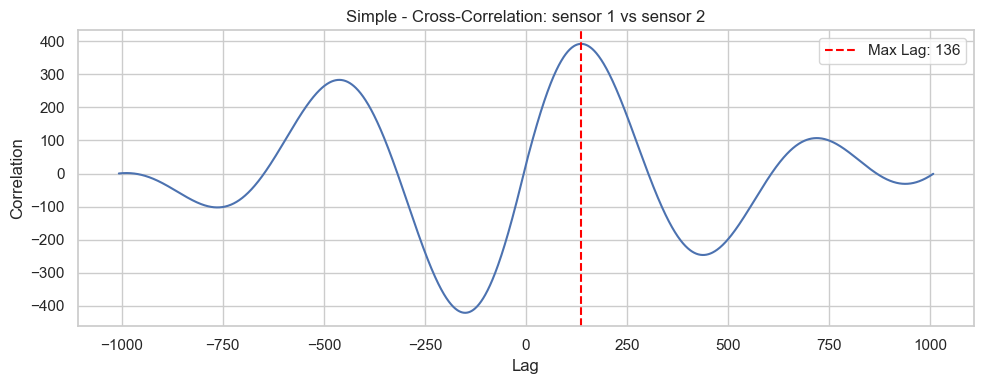

📊 Simple - Max correlation between sensor 1 and sensor 3 occurs at lag = 0
   → sensor 1 and sensor 3 are synchronized (no lag)


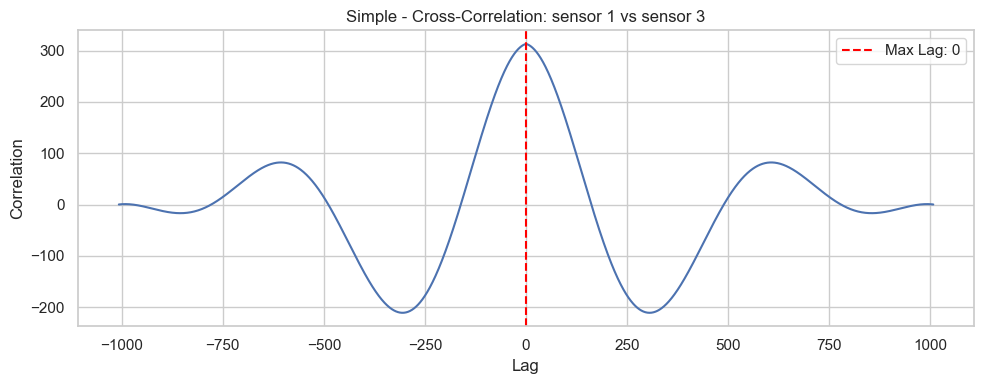

📊 Simple - Max correlation between sensor 2 and sensor 3 occurs at lag = -136
   → sensor 2 is ahead of sensor 3 by 136 time steps


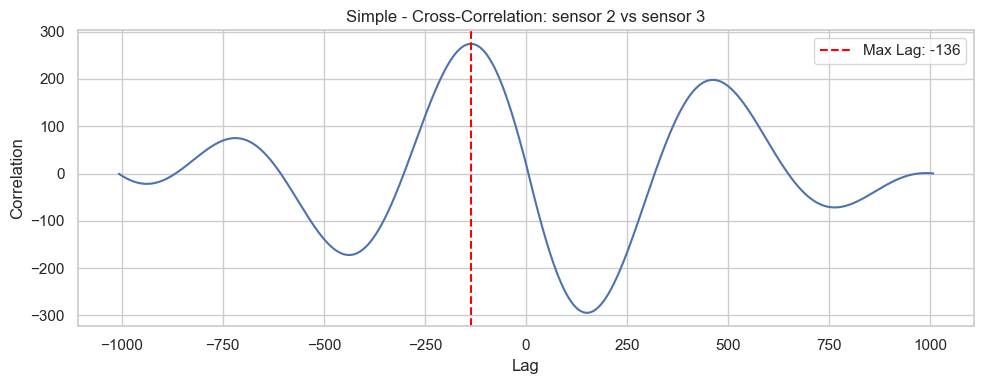

📊 Complex - Max correlation between sensor 1 and sensor 2 occurs at lag = 126
   → sensor 2 is ahead of sensor 1 by 126 time steps


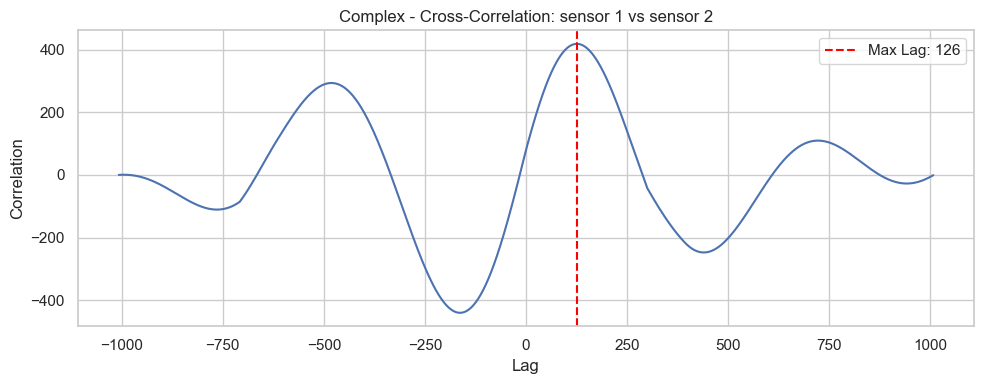

📊 Complex - Max correlation between sensor 1 and sensor 3 occurs at lag = -5
   → sensor 1 is ahead of sensor 3 by 5 time steps


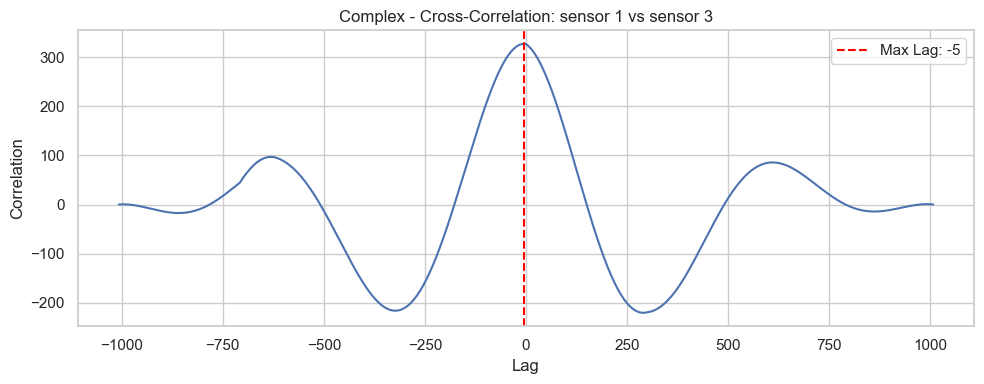

📊 Complex - Max correlation between sensor 2 and sensor 3 occurs at lag = -136
   → sensor 2 is ahead of sensor 3 by 136 time steps


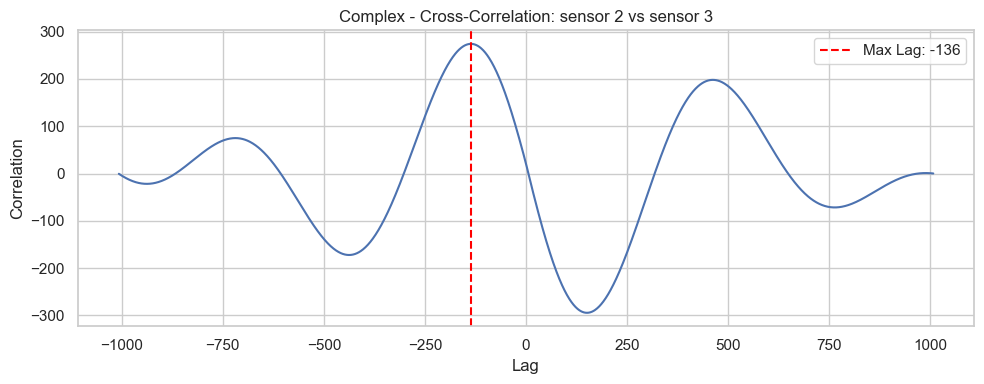

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def compute_and_plot_lagged_corr(df, name="Dataset"):
    sensor_pairs = [
        ('sensor 1', 'sensor 2'),
        ('sensor 1', 'sensor 3'),
        ('sensor 2', 'sensor 3')
    ]

    for s1_label, s2_label in sensor_pairs:
        x = df[s1_label] - df[s1_label].mean()
        y = df[s2_label] - df[s2_label].mean()

        corr = np.correlate(x, y, mode='full')
        lags = np.arange(-len(x) + 1, len(x))
        max_corr_idx = np.argmax(corr)
        max_lag = lags[max_corr_idx]

        print(f"📊 {name} - Max correlation between {s1_label} and {s2_label} occurs at lag = {max_lag}")
        if max_lag > 0:
            print(f"   → {s2_label} is ahead of {s1_label} by {max_lag} time steps")
        elif max_lag < 0:
            print(f"   → {s1_label} is ahead of {s2_label} by {abs(max_lag)} time steps")
        else:
            print(f"   → {s1_label} and {s2_label} are synchronized (no lag)")
        
        # Optional: Plot
        plt.figure(figsize=(10, 4))
        plt.plot(lags, corr)
        plt.axvline(x=max_lag, color='red', linestyle='--', label=f'Max Lag: {max_lag}')
        plt.title(f"{name} - Cross-Correlation: {s1_label} vs {s2_label}")
        plt.xlabel("Lag")
        plt.ylabel("Correlation")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Run for Simple dataset
compute_and_plot_lagged_corr(simple_cleaned, name="Simple")

# Run for Complex dataset
compute_and_plot_lagged_corr(complex_cleaned, name="Complex")


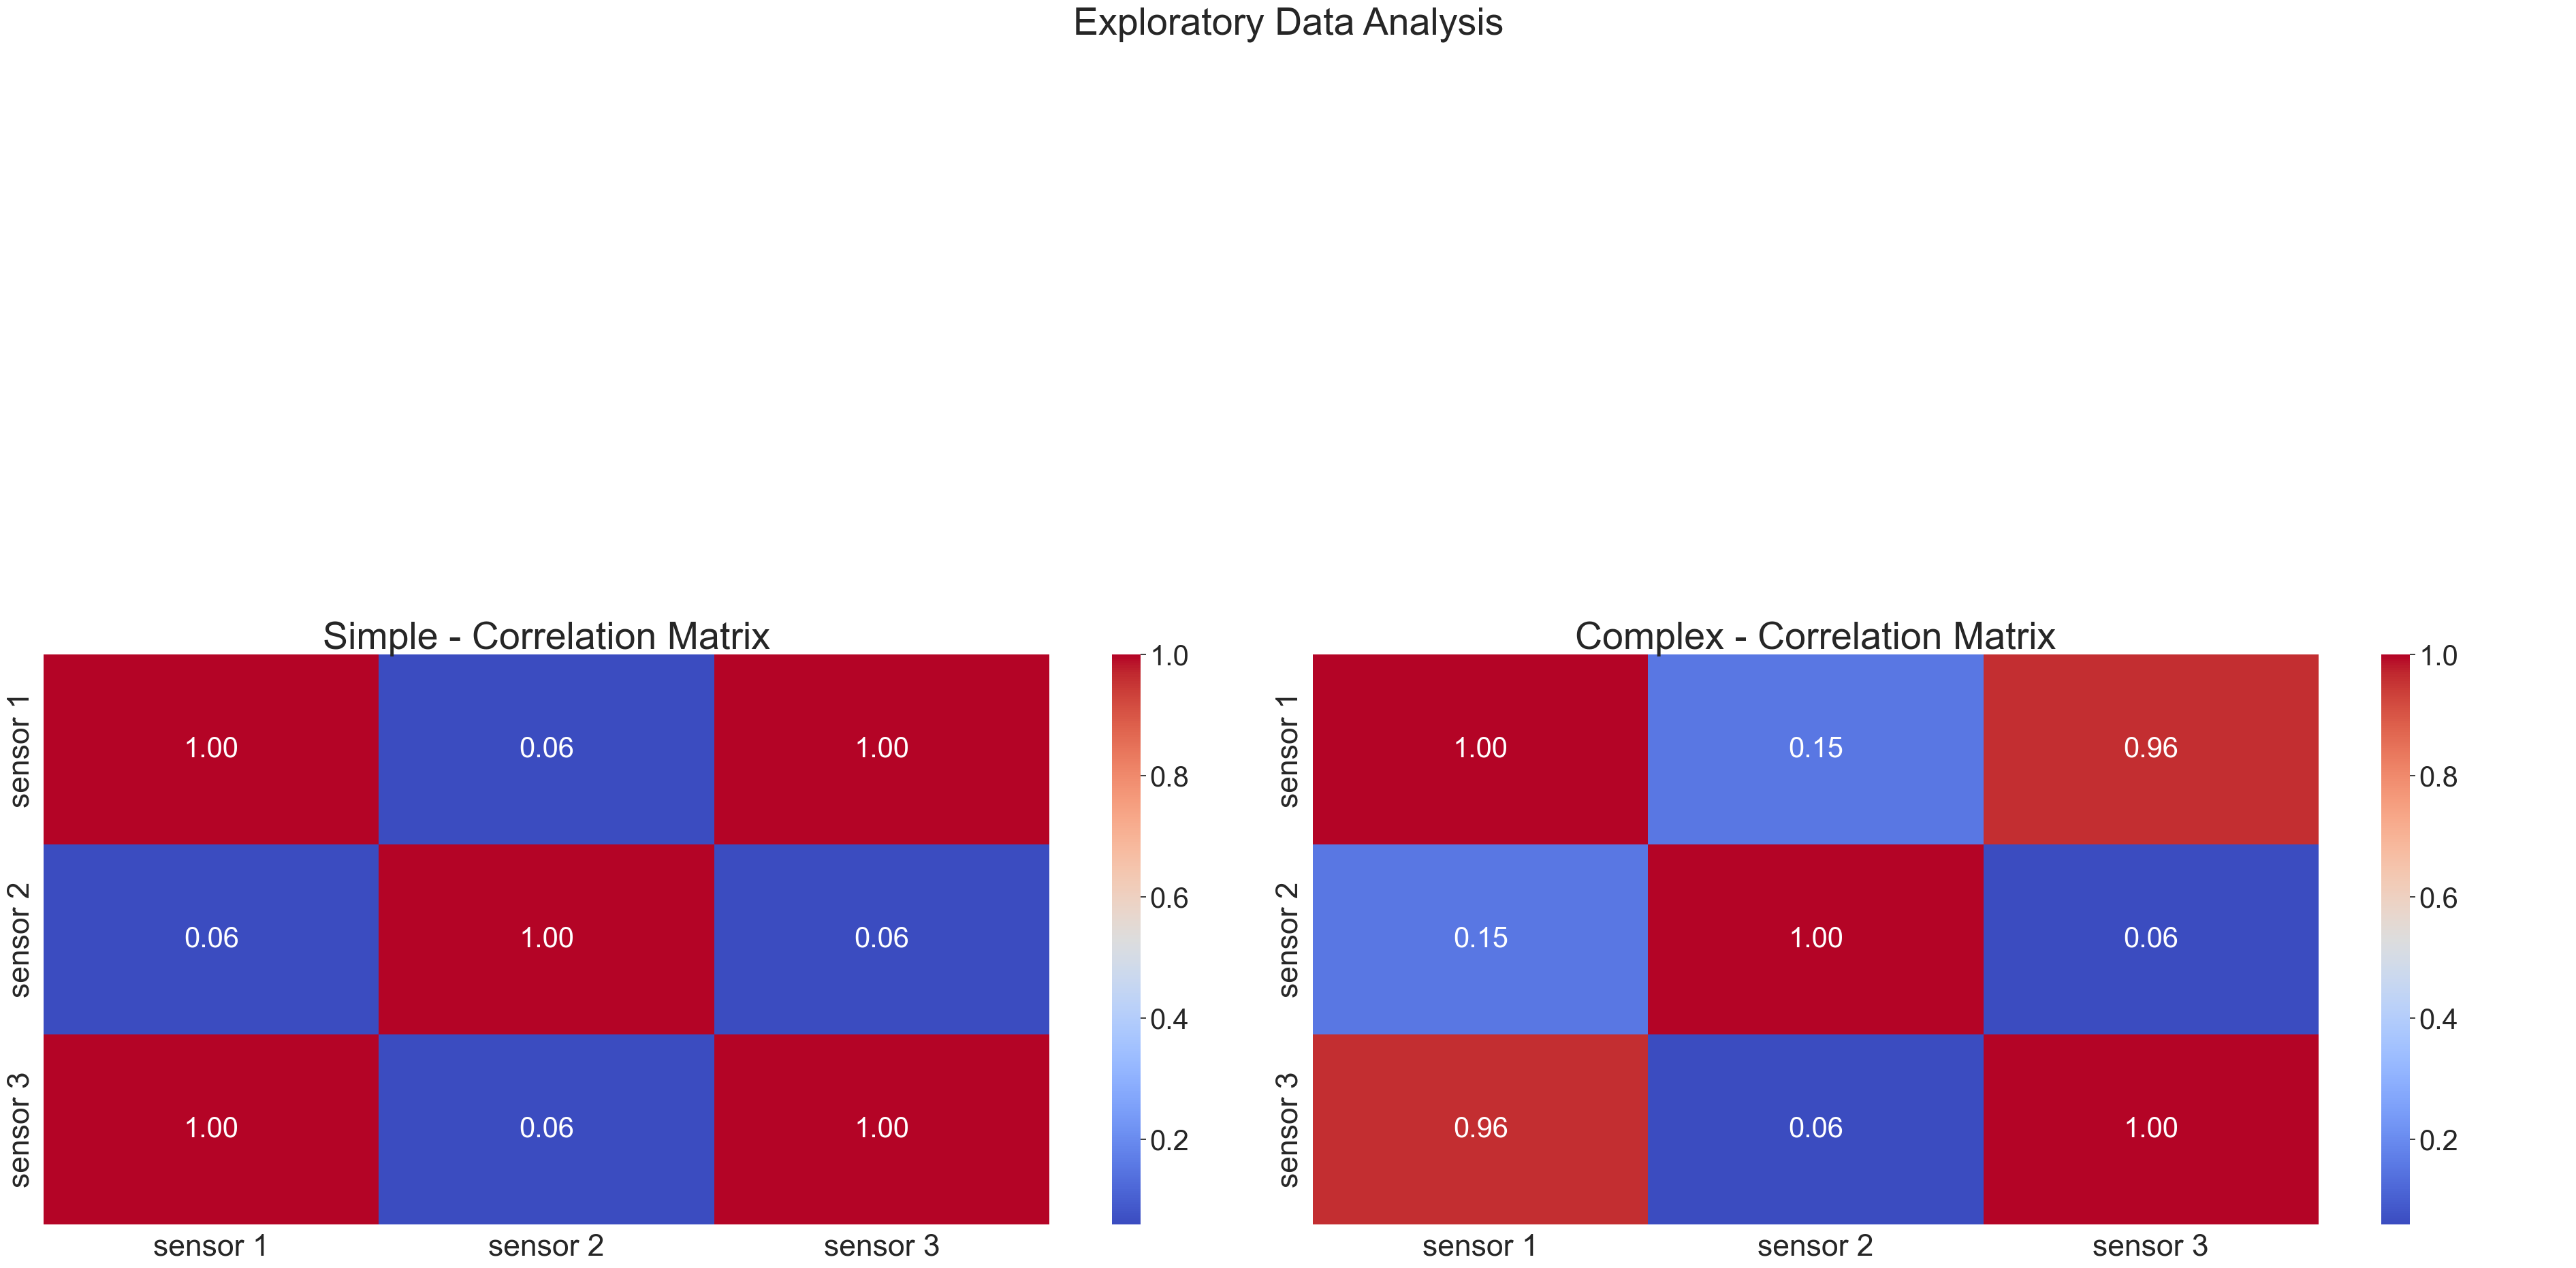

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(38, 20))
fig.suptitle("Exploratory Data Analysis", fontsize=40)

# First row: leave blank
for ax in axes[0]:
    ax.axis('off')

# SIMPLE heatmap
simple_heatmap = sns.heatmap(
    simple_cleaned.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    ax=axes[1, 0],
    annot_kws={"size": 30}
)
axes[1, 0].set_title("Simple - Correlation Matrix", fontsize=40)
axes[1, 0].tick_params(labelsize=32)
# Enlarge colorbar ticks
simple_heatmap.collections[0].colorbar.ax.tick_params(labelsize=30)

# COMPLEX heatmap
complex_heatmap = sns.heatmap(
    complex_cleaned.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    ax=axes[1, 1],
    annot_kws={"size": 30}
)
axes[1, 1].set_title("Complex - Correlation Matrix", fontsize=40)
axes[1, 1].tick_params(labelsize=32)
# Enlarge colorbar ticks
complex_heatmap.collections[0].colorbar.ax.tick_params(labelsize=30)

# Display everything
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


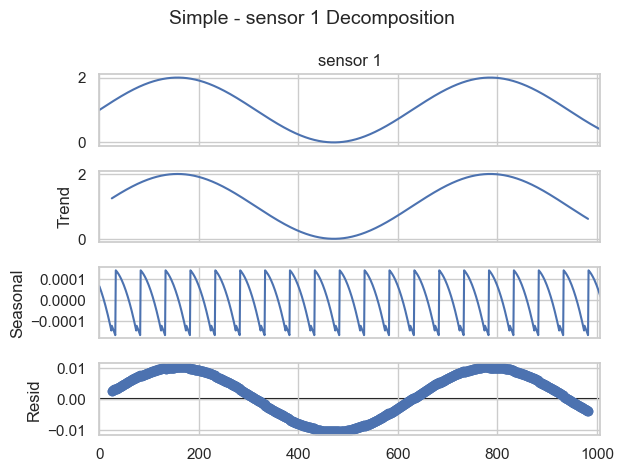

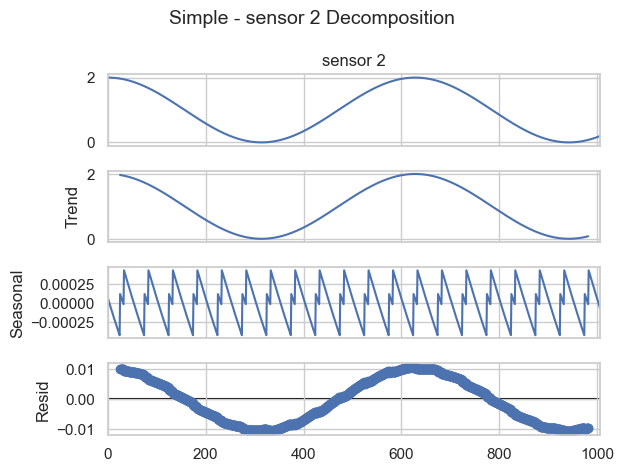

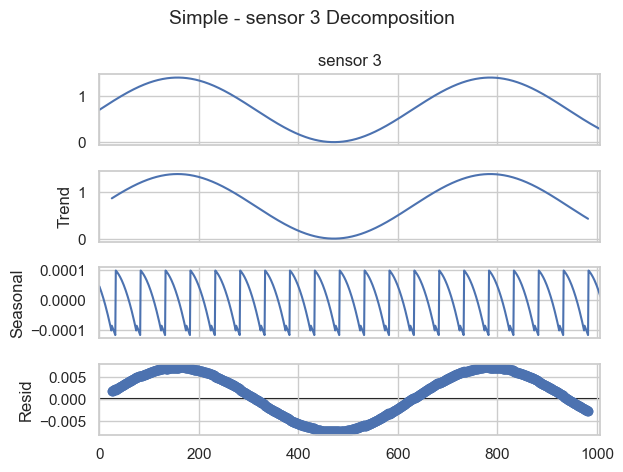

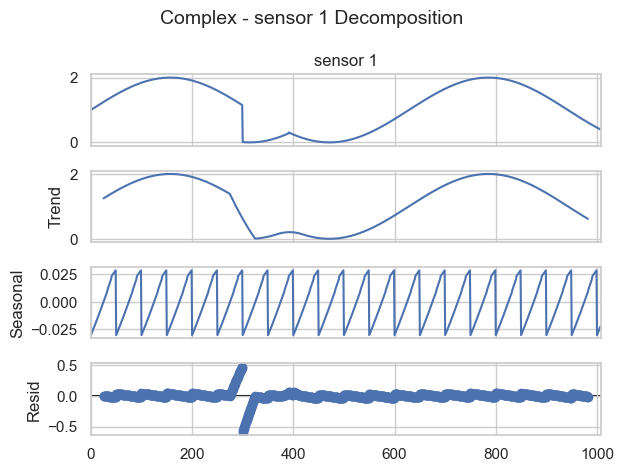

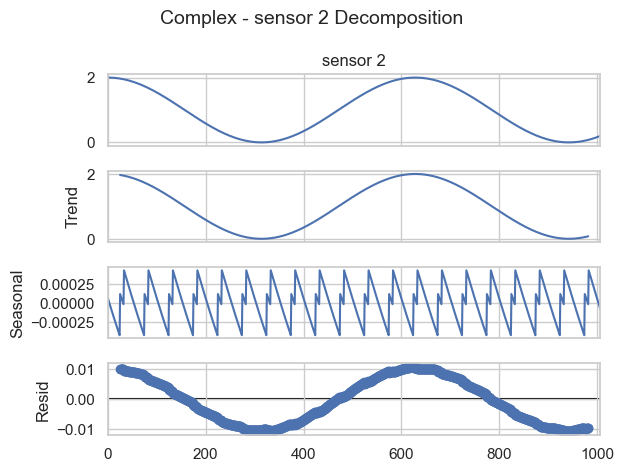

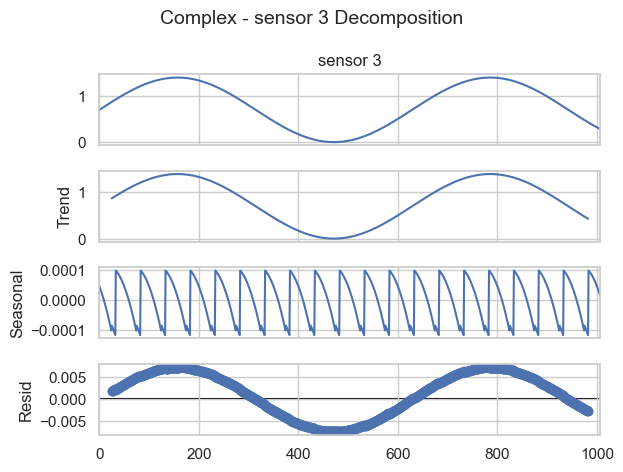

In [24]:
#Trend & Seasonality Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def decompose_sensor(df, sensor, name="Simple"):
    # Use an integer index if no time column
    ts = df[sensor]

    # Decompose using additive model (can change to 'multiplicative' if needed)
    result = seasonal_decompose(ts, model='additive', period=50)  # You can tune `period`

    # Plot decomposition
    result.plot()
    plt.suptitle(f"{name} - {sensor} Decomposition", fontsize=14)
    plt.tight_layout()
    plt.show()

# Apply to all sensors in Simple
for sensor in ['sensor 1', 'sensor 2', 'sensor 3']:
    decompose_sensor(simple_cleaned, sensor, name="Simple")

# Apply to all sensors in Complex
for sensor in ['sensor 1', 'sensor 2', 'sensor 3']:
    decompose_sensor(complex_cleaned, sensor, name="Complex")
